# Лабораторная работа №4

Стратиенко Илья ИУ10-56, Вариант - 17

База данных "nike_vs_addidas"

## Метрические методы классификации

### Цель работы
- Изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

In [5]:
pip install -U scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.6/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data_source = "./data_nike_vs_addidas_unsupervised.csv"
data = pd.read_csv(data_source, 
                   delimiter=',', 
                   names=['Product Name','Product ID',
                          'Listing Price','Sale Price',
                          'Discount', 'Brand' , 'Rating' , 'Reviews'],
                   header=None)
data.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
1,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
2,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
3,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
4,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
5,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1,45
7,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
8,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
9,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Чтение данных из файла
data_source = "./data_nike_vs_addidas_unsupervised.csv"
data = pd.read_csv(data_source)

# Преобразование категориальных признаков в числовые, например, с использованием one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Product Name','Product ID',
                          'Listing Price','Sale Price',
                          'Discount', 'Brand' , 'Rating' , 'Reviews'])

# Разделение данных
X = data_encoded.drop('Discount_50', axis=1)
y = data_encoded['Discount_50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели k-ближайших соседей
def build_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Предсказание и оценка точности
k_value = int(input("Введите количество ближайших соседей (K): "))

knn_classifier = build_knn_classifier(X_train, y_train, k_value)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Введите количество ближайших соседей (K):  100


Точность модели: 0.85


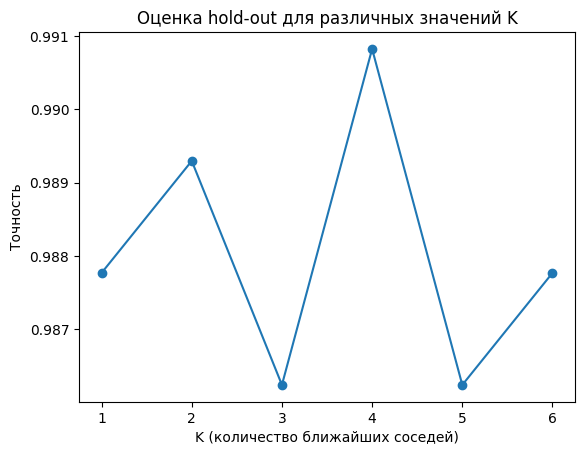

In [26]:
import matplotlib.pyplot as plt

def evaluate_holdout(X_train, y_train, X_test, y_test, k_values):
    accuracies = []

    for k in k_values:
        knn_classifier = build_knn_classifier(X_train, y_train, k)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = list(range(1, 7))

holdout_accuracies = evaluate_holdout(X_train, y_train, X_test, y_test, k_values)

plt.plot(k_values, holdout_accuracies, marker='o')
plt.title('Оценка hold-out для различных значений K')
plt.xlabel('K (количество ближайших соседей)')
plt.ylabel('Точность')
plt.show()

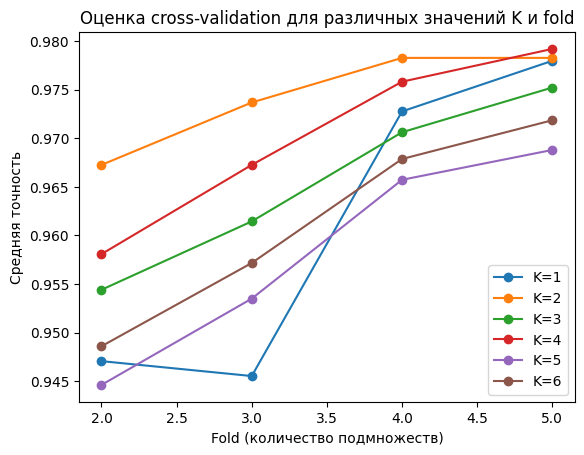


Оптимальное значение K на основе hold-out: 5
Оптимальные значения K на основе cross-validation:
Для K=1, оптимальное значение fold: 5
Для K=2, оптимальное значение fold: 5
Для K=3, оптимальное значение fold: 5
Для K=4, оптимальное значение fold: 5
Для K=5, оптимальное значение fold: 5
Для K=6, оптимальное значение fold: 5

Наилучшее значение K: 4

Точность модели с использованием наилучшего значения K: 0.99


In [28]:
from sklearn.model_selection import cross_val_score

def evaluate_cross_validation(X, y, k_values, fold_values):
    results = {}

    for k in k_values:
        k_results = []
        for fold in fold_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn_classifier, X, y, cv=fold)
            k_results.append(scores.mean())

        results[k] = k_results

    return results

fold_values = list(range(2, 6))

cross_validation_results = evaluate_cross_validation(X, y, k_values, fold_values)

for k, results in cross_validation_results.items():
    plt.plot(fold_values, results, label=f'K={k}', marker='o')

plt.title('Оценка cross-validation для различных значений K и fold')
plt.xlabel('Fold (количество подмножеств)')
plt.ylabel('Средняя точность')
plt.legend()
plt.show()

optimal_k_holdout = fold_values[holdout_accuracies.index(max(holdout_accuracies))]
print(f"\nОптимальное значение K на основе hold-out: {optimal_k_holdout}")

optimal_k_values = {}
for k, results in cross_validation_results.items():
    optimal_k_values[k] = fold_values[results.index(max(results))]

print("Оптимальные значения K на основе cross-validation:")
for k, optimal_k in optimal_k_values.items():
    print(f"Для K={k}, оптимальное значение fold: {optimal_k}")

best_k = max(optimal_k_values, key=lambda k: cross_validation_results[k][fold_values.index(optimal_k_values[k])])

print(f"\nНаилучшее значение K: {best_k}")

best_knn_classifier = build_knn_classifier(X_train, y_train, best_k)

y_pred_best_k = best_knn_classifier.predict(X_test)

accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f"\nТочность модели с использованием наилучшего значения K: {accuracy_best_k:.2f}")

## Контрольные вопросы

### Особенности методов метрической классификации:
- Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
- Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

### Принципы и этапы реализации метода kNN:
- Принцип: Определение класса объекта основывается на классе его соседей.
- Этапы:
    Задание количества соседей (K).
    Вычисление расстояний между объектом и всеми точками обучающей выборки.
    Выбор K ближайших соседей.
    Определение класса объекта на основе большинства классов среди соседей.
    
### Выбор количества соседей:
- Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

### Метод парзеновского окна:
- Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

### Параметры для оптимизации в методах kNN:
- k (количество соседей): Оптимизируется для достижения наилучшей производительности.
- Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.